# Law of Large Numbers 

## Yu Tian and Alexander Jung
## Aalto University, 2021

Many machine learning methods make use of the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers). This law applies to a **sample** of $m$ data points $u^{(1)},\ldots,u^{(m)}$ that are realizations of **independent and identically distributed (i.i.d.)** random variables (RVs). The law of large numbers states that the average or empirical mean 
$$ \bar{U} = (1/m) \sum_{i=1}^{m} u^{(i)}$$
converges, for $m \rightarrow \infty$, to the mean (or expectation) ${\rm E} \{ u^{(i)}\} $, which is the same for all $i=1,\ldots,m$. Different forms of the law of large numbers use different notions of convergence. For our purposes, it is enough to informally use the term convergence in the sense of an approximation. Thus, for sufficiently large sample size $m$, the empiricial mean $\bar{U}$ is close to the mean ${\rm E} \{ u^{(i)}\} $. 

The paradigm of **empiricial risk minimization** uses the law of large numbers to approximate the risk of a hypothesis $h$ using the empirical mean 
$$ (1/m) \sum_{i=1}^{m} \underbrace{\mathcal{L}\big((x^{(i)},y^{(i)}),h\big)}_{\mbox{ i.i.d. RVs}}.$$

This notebook illustrates the law of large numbers by using random number generators provided by the programming language Python. A random number generator delivers realizations of i.i.d random variables which have a given distribution. Often used examples for this distribution are the [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (for numeric data) or the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) (for discrete or categorial data). We use varying sample size $m$ to see how sample means and sample variances change over sample times (number of trials)。

In [45]:
import matplotlib.pyplot as plt    # package 'pyplot' provides functions for visualization
import random                      # package 'random' provides functions for random number generation 
import numpy as np                 # package 'numpy' provides functions for matrices and vectors 

In [46]:
#configure, feel free to change configure and rerun the following code
mu    = 1           # mean of Gaussian distribution 
sigma = 0.2           # standard deviation (= square root of variance) of Gaussian distribution 
m = 200             # sample size m which is the number of i.i.d. RVs which are averaged 

/Users/alexanderjung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0, 0.5, '$x^{(i)}$')

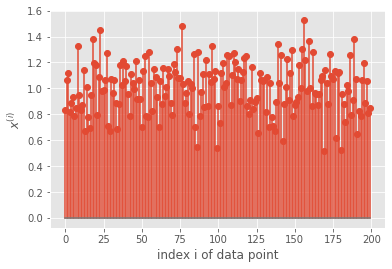

In [47]:
# generate realizations of m i.i.d. RVs with normal distribution with mean mu and variance sigma^2

u = np.random.normal(mu,sigma,m) # numpy array "u" contains realdizations u^{(1)},...,u^{(m)}
plt.stem(u)
plt.xlabel("index i of data point")
plt.ylabel("$x^{(i)}$")


To study how well the empirical mean approximates the mean of the RVs, we use several repetitions of the above random data generations. During each repetition we generate a fresh set of $m$ random numbers $x^{(1)},\ldots,x^{(m)}$ which are realizations of $m$ i.i.d. RVs with a normal (Gaussian) distribution with mean $\mu$ and variance $\sigma^2$. For each repetition we compute the empirical mean of the $m$ numbers. Due to random fluctuations the empirical mean will be different for each repetition. However, for large sample size $m$, the variation of the sample means will become smaller. 

/Users/alexanderjung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'empirical mean')

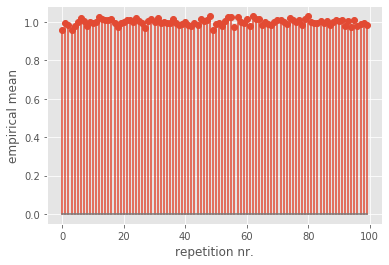

In [48]:
# repeat L times the generation of realizatios for m RVs 
# for each repetition compute the empirical mean 

L = 100                            # number of repetitions for the generation of m random numbers 
sample_means= np.zeros([L,1])       # numpy array that stores the empirical mean for each of the L repetitions

# list of observation means of each sample
for j in range (0,L):
        # randomly pick observations from a Gaussian distribution, feel free to try different distributions
    rvs = np.random.normal(mu,sigma,m)  
    sample_means[j] = (sum(rvs)/m)             # calculate the mean of each sample and save it in list of mean
    

plt.stem(sample_means, linefmt=None, markerfmt=None, basefmt=None)
plt.xlabel("repetition nr.")
plt.ylabel("empirical mean")